In [6]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Build model using LinearRegression

In [7]:
cars = pd.read_csv("final_cars.csv")

In [8]:
cars.columns

Index(['make', 'fuel-type', 'num-of-doors', 'body-style', 'drive-wheels',
       'curb-weight', 'engine-size', 'width', 'highway-mpg', 'price'],
      dtype='object')

In [9]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [10]:
X.sample(5)

,make,fuel-type,num-of-doors,body-style,drive-wheels,curb-weight,engine-size,width,highway-mpg
55,mazda,gas,two,hatchback,rwd,2500,80,65.7,23
72,mercury,gas,two,hatchback,rwd,2910,140,68.0,24
38,honda,gas,four,sedan,fwd,2304,110,65.2,33
17,chevrolet,gas,two,hatchback,fwd,1488,61,60.3,53
197,volvo,gas,four,sedan,rwd,3049,141,68.8,25


In [11]:
X  = pd.get_dummies(X)

In [12]:
X.shape,y.shape

((201, 38), (201,))

In [13]:
X.columns

Index(['curb-weight', 'engine-size', 'width', 'highway-mpg',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel-type_diesel', 'fuel-type_gas', 'num-of-doors_four',
       'num-of-doors_two', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd'],
      dtype='object')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [17]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
# Display coefficient for each column
for t in zip(X_train.columns, model.coef_):
  print(f"{t[0]:25s} {t[1]:.0f}")

curb-weight               5
engine-size               36
width                     434
highway-mpg               -71
make_alfa-romero          -1866
make_audi                 1601
make_bmw                  8099
make_chevrolet            362
make_dodge                -1863
make_honda                -1185
make_isuzu                -4671
make_jaguar               6776
make_mazda                -1390
make_mercedes-benz        6019
make_mercury              -1553
make_mitsubishi           -2880
make_nissan               -1771
make_peugot               -3754
make_plymouth             -2450
make_porsche              11694
make_renault              -3627
make_saab                 -258
make_subaru               -2509
make_toyota               -2727
make_volkswagen           -1678
make_volvo                -365
fuel-type_diesel          77
fuel-type_gas             -77
num-of-doors_four         -23
num-of-doors_two          23
body-style_convertible    3140
body-style_hardtop        -1170
body-s

In [19]:
model.intercept_

-28360.414475881775

### Calculate accuracy with train data

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [21]:
y_pred = model.predict(X_train)
print("MSE  : ", mean_squared_error(y_train,y_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_train,y_pred)))

MSE  :  3822108.7027100893
RMSE :  1955.0214072255294


In [22]:
r2score = r2_score(y_train,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.93


### Test with test data

In [23]:
y_pred = model.predict(X_test)

In [24]:
## get MSE 
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error : {rmse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 6394270.72
Root Mean Squared Error : 2528.69
Mean Absolute Error : 1691.94
R2 Score: 0.93


<AxesSubplot:ylabel='price'>

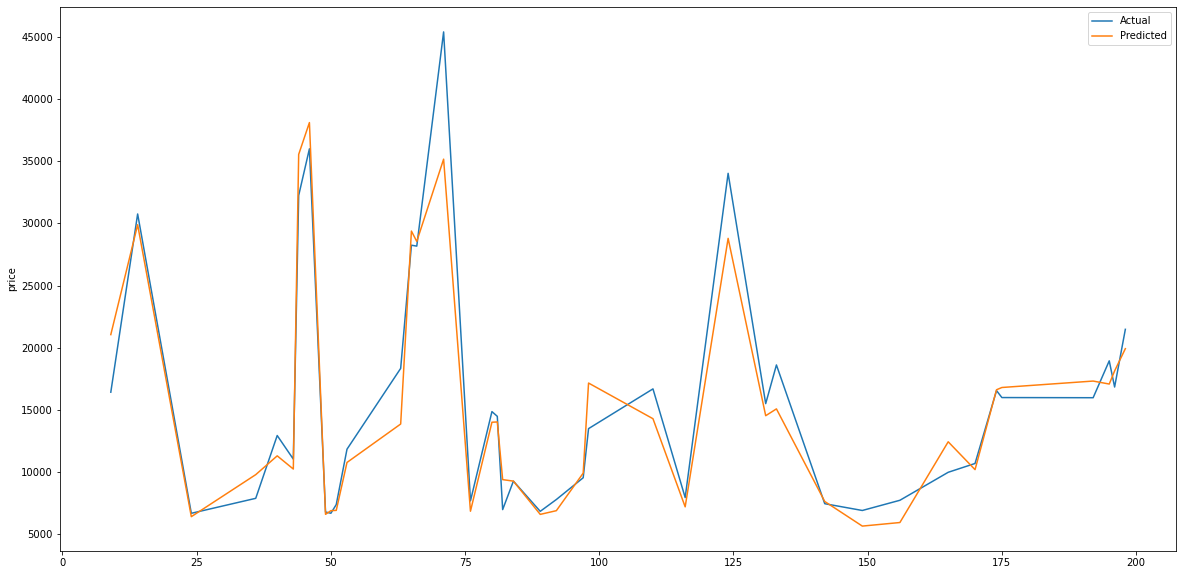

In [25]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

In [26]:
for p,a in zip(y_pred[:10],y_test[:10]):
    print(f"{p:6.0f}  -  {a:6.0f} - {p - a:6.0f}")

 35168  -   45400 - -10232
  6420  -    6692 -   -272
  6925  -    7395 -   -470
 16625  -   16558 -     67
  9920  -    9549 -    371
 11311  -   12945 -  -1634
 28799  -   34028 -  -5229
  9279  -    9279 -     -0
  7642  -    7463 -    179
 14539  -   15510 -   -971


In [27]:
# Display % of difference 
for p,a in zip(y_pred[:10],y_test[:10]):
    d = p - a
    print(f"{p:6.0f}  -  {a:6.0f} - {p - a:6.0f} - {abs(d / a * 100):5.2f}")

 35168  -   45400 - -10232 - 22.54
  6420  -    6692 -   -272 -  4.06
  6925  -    7395 -   -470 -  6.35
 16625  -   16558 -     67 -  0.40
  9920  -    9549 -    371 -  3.88
 11311  -   12945 -  -1634 - 12.62
 28799  -   34028 -  -5229 - 15.37
  9279  -    9279 -     -0 -  0.00
  7642  -    7463 -    179 -  2.40
 14539  -   15510 -   -971 -  6.26


## Model with Standardization 

In [28]:
cars = pd.read_csv("final_cars.csv")

In [29]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [30]:
X = pd.get_dummies(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
## Scale X_train and X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train = pd.DataFrame(X_train,columns = X.columns)

In [35]:
X_test = pd.DataFrame(X_test,columns = X.columns)

In [36]:
X_test.head()

,curb-weight,engine-size,width,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,...,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,2.413275,4.982797,2.994086,-2.238975,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,-0.271708,...,-1.148408,1.148408,-0.197386,5.567764,-0.733799,-0.916013,-0.377964,-0.229416,-1.224745,1.362770
1,-1.071322,-0.923353,-0.956277,1.017716,-0.138233,-0.197386,-0.197386,-0.138233,4.358899,-0.271708,...,0.870771,-0.870771,-0.197386,-0.179605,-0.733799,1.091687,-0.377964,-0.229416,0.816497,-0.733799
2,-1.150058,-0.895755,-0.763576,1.017716,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,-0.271708,...,0.870771,-0.870771,-0.197386,-0.179605,-0.733799,1.091687,-0.377964,-0.229416,0.816497,-0.733799
3,0.921319,1.312152,0.922554,-1.054724,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,-0.271708,...,-1.148408,1.148408,-0.197386,-0.179605,1.362770,-0.916013,-0.377964,-0.229416,-1.224745,1.362770
4,-0.439410,-0.095388,-0.281825,0.425590,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,-0.271708,...,0.870771,-0.870771,-0.197386,-0.179605,-0.733799,1.091687,-0.377964,-0.229416,0.816497,-0.733799


In [37]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
## get MSE 
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Root Mean Squared Error : {rmse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 6393948.87
Root Mean Squared Error : 2528.63
Mean Absolute Error : 1691.94
R2 Score: 0.93


### Micro model with 2 features 

In [61]:
# Micro model
X_micro =  X[['engine-size','highway-mpg']]
y_micro =  y

In [62]:
X_micro_train, X_micro_test, y_micro_train, y_micro_test = train_test_split(X_micro,y_micro, test_size=0.2, random_state=0)

In [63]:
micro_model = LinearRegression()
micro_model.fit(X_micro_train,y_micro_train)

LinearRegression()

In [64]:
micro_model.score(X_micro_train,y_micro_train) # r2 for train data 

0.7796926906820936

In [65]:
y_micro_pred = micro_model.predict(X_micro_test)

In [66]:
r2score = r2_score(y_micro_test,y_micro_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.79


## RandomForestRegressor 

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [76]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train)}')

Train score : 0.9868980300580661


In [77]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.94


In [78]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  5462981.713949746
RMSE :  2337.302229911602


In [80]:
for f,v in sorted(zip (X_train.columns, model.feature_importances_),
                  key = lambda t : t[1], reverse = True):
      print(f"{f:30} {v:0.2f}")

engine-size                    0.58
curb-weight                    0.26
highway-mpg                    0.07
width                          0.04
make_bmw                       0.02
body-style_sedan               0.00
drive-wheels_rwd               0.00
make_audi                      0.00
fuel-type_diesel               0.00
make_porsche                   0.00
fuel-type_gas                  0.00
body-style_convertible         0.00
body-style_wagon               0.00
body-style_hatchback           0.00
drive-wheels_fwd               0.00
make_peugot                    0.00
num-of-doors_two               0.00
make_mazda                     0.00
num-of-doors_four              0.00
body-style_hardtop             0.00
make_toyota                    0.00
drive-wheels_4wd               0.00
make_alfa-romero               0.00
make_volvo                     0.00
make_isuzu                     0.00
make_subaru                    0.00
make_renault                   0.00
make_plymouth               

<AxesSubplot:ylabel='price'>

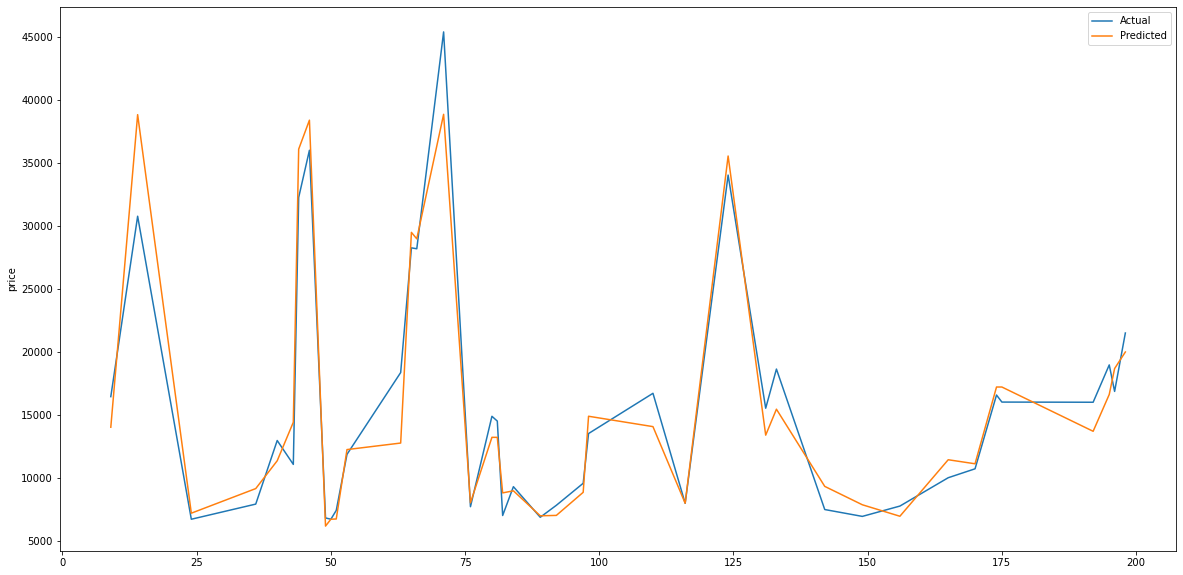

In [52]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

### SGDRegressor

In [81]:
from sklearn.linear_model import SGDRegressor

In [82]:
X_mini = X[['curb-weight','engine-size','highway-mpg']]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [85]:
## use same scale for X_train and X_test
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
model = SGDRegressor(random_state=100)
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train)}')

Train score : 0.929421999188137


In [87]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.93


In [88]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  6257019.257392358
RMSE :  2501.403457539858
